<a href="https://colab.research.google.com/github/TumugantiBhoomika/MothEradication/blob/main/Moth_Eradication_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
def Left_index(points) -> int :
    minn = 0
    for i in range(1,len(points)):
        if points[i].x < points[minn].x:
            minn = i
        elif points[i].x == points[minn].x:
            if points[i].y > points[minn].y:
                minn = i
    return minn

In [ ]:

def orientation(p, q, r) -> int :
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # p, q and r are colinear
    elif val > 0:
        return 1  # Clockwise
    else:
        return 2  # Counterclockwise


In [ ]:
def convexHull(points, n) -> [int] :
    if n < 3:
        return
    l = Left_index(points)
    hull = []
    lst = []
    p = l
    q = 0
    while(True):
        hull.append(p)
        q = (p + 1) % n
        for i in range(n):
            if(orientation(points[p],
                           points[i], points[q]) == 2):
                q = i
        p = q
        if(p == l):
            break
    l = []
    ls = []
    for each in hull:
        l.append([points[each].x,points[each].y])
    ls.append(l[0])
    l.extend(ls)
    return l[::-1]


In [ ]:
def perimeter_length(list_points) -> int :
    perimeter = 0
    for i in range(0,len(list_points)) :
        p1 = list_points[i]
        if i == len(list_points) - 1 :
            break
        else :
            p2 = list_points[i+1]
        perimeter += math.sqrt(((p2[0]-p1[0])**2)+((p2[1]-p1[1])**2))
    return '{:.2f}'.format(perimeter,2)

In [ ]:
def Take_input(no) :
    point_list = []
    x_coordinates = []
    y_coordinates = []
    for i in range(no):
        x, y = [float(i) for i in input().split()]
        y_coordinates.append(y)
        x_coordinates.append(x)
        point_list.append(Point(x,y))

    perimeter_list = convexHull((point_list), len(point_list))
    return perimeter_list ,x_coordinates,y_coordinates

In [ ]:
def Plotting(x,y,graph_list) :
    plt.scatter(x,y,color = 'blue')
    plt.xlabel("X - Axis")
    plt.ylabel("Y - Axis")
    x_data = []
    y_data = []
    flat_list = [item for sublist in graph_list for item in sublist]
    x_data = (flat_list[::2])
    y_data = (flat_list[1::2])
    plt.plot(x_data,y_data,color='orange')
    plt.legend(["Boundary", "Location"], loc ="lower right")
    plt.show()

3
0 0
1 0
0 1

Region # 1 :
(0.0, 1.0)-(1.0, 0.0)-(0.0, 0.0)-(0.0, 1.0)
Perimeter Length =  3.41


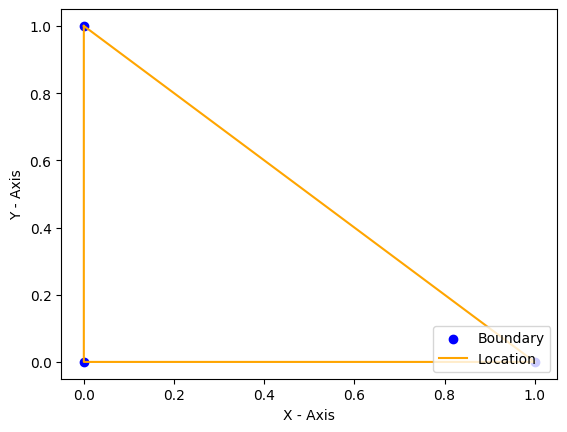

0


In [ ]:
def Printing_output(final_list) -> str :
    st = ""
    # count = 1
    lt =[]
    for i in (tuple(ele) for ele in tuple(final_list)) :
        lt.append(i)
    tuple_form = tuple(lt)
    s = [str(i) for i in tuple_form]
    print("-".join(s))

n=1
count = 1
while(n!=0) :
  for count in range(1,10000):
    n = int(input())
    if (n==0):
      break
    out,x_points,y_points = Take_input(n)
    print()
    print("Region #",count,":")
    Printing_output(out)
    print ("Perimeter Length = ",perimeter_length(out))
    Plotting(x_points,y_points,out)
